<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Supervised**: `Cross validation, hyperparameter tuning & Model Selection`
---



#### **1. Cross Validation**

When evaluating different settings hyperparameters for estimators, such as the alpha setting that must be manually set for a Logistic Regression, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.

This way, knowledge about the test set can **leak** into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be dine on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. The performance measure a reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems such as inverse inference where the number of samples is very small.

#### **1. Cross Validation**

**Why Use Cross-Validation?**

When we train a machine learning model, one of our main concerns is generalization — how well the model performs on new, unseen data. A common practice is to split the dataset into a training set and a test set, train the model on the training set, and evaluate on the test set.

However, when we start tuning hyperparameters (e.g., the regularization strength alpha in Logistic Regression), we risk overfitting to the test set. This happens because we might keep tweaking hyperparameters until the test set performance looks best. In reality, we are unintentionally letting knowledge of the test set "leak" into the model, which makes the test set no longer a reliable measure of generalization.

To fix this, we can introduce a **validation set**:

* Train on the training set.

* Tune hyperparameters using the validation set.

* Perform final evaluation on the test set.

But there’s a drawback. Splitting into three sets reduces the data available for training. Worse, the results might depend too heavily on which random split we happened to choose.

This is where cross-validation (CV) comes in. Instead of relying on one arbitrary split, CV provides a more robust approach:

* The training data is divided into k folds.
* The model is trained k times, each time leaving out one fold as the “validation set” and using the remaining folds for training.
* Performance is averaged across folds to get a more reliable estimate.

The advantage is that every data point gets used for both training and validation, and we don’t waste valuable data. This is especially important when working with small datasets.

Another analogy for the urgency why we need cross validation can be explained as a student preparing for exam
* Imagine you are a student, if you only practice with one set of sample questions, you might get lucky (easy set) or unlucky (hard set).

* If you instead practice with five different sets of sample questions, you’ll get a more accurate picture of your true preparedness.

In [6]:
import numpy as np

# Define feature and target

X_train = np.arange(30)
y_train = np.hstack(([0]*10,[1]*20))


y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

The following sections list utilities to generate indices that can be used to generate dataset splits according to different cross validation strategies.

**1.1 K-Fold**

Divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1 folds and the fold left out is used for test.

In [7]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)
for train, validation in cv.split(X_train):
    print(f'{train} {validation}')

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [0 1 2 3 4 5]
[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [ 6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29] [12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29] [18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [24 25 26 27 28 29]


**1.2 Repeated K-Fold**

Repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [8]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
for train, validation in cv.split(X_train):
    print(f'{train} {validation}')


[ 0  1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22 24 25 26 28 29] [ 8  9 15 17 23 27]
[ 1  2  3  5  6  7  8  9 10 11 13 14 15 17 18 19 20 21 22 23 25 26 27 29] [ 0  4 12 16 24 28]
[ 0  3  4  6  7  8  9 10 12 14 15 16 17 18 19 20 21 23 24 25 26 27 28 29] [ 1  2  5 11 13 22]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 22 23 24 27 28] [ 3 18 21 25 26 29]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 21 22 23 24 25 26 27 28 29] [ 6  7 10 14 19 20]
[ 1  2  3  4  6  8  9 10 11 12 14 15 16 17 18 19 21 22 23 24 25 27 28 29] [ 0  5  7 13 20 26]
[ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 17 18 19 20 23 25 26 27 28] [10 12 21 22 24 29]
[ 0  2  4  5  7  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25 26 27 28 29] [ 1  3  6  8 16 17]
[ 0  1  3  5  6  7  8  9 10 12 13 14 15 16 17 20 21 22 24 25 26 27 28 29] [ 2  4 11 18 19 23]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 16 17 18 19 20 21 22 23 24 26 29] [ 9 14 15 25 27 28]


**1.3 Shuffle Split K-Fold**

will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets. This is a good alternative to KFold cross validation that allows a finer control on the number of iterations and the proportion of samples on each side of the train / test split.

In [9]:
from sklearn.model_selection import ShuffleSplit

cv =ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train, validation in cv.split(X_train):
    print(f'{train} {validation}')

[28 24 12  0  4 16  5 13 11 22  1  2 25  3 21 26 18 29 20  7 10 14 19  6] [27 15 23 17  8  9]
[21 10 12 29 24 22 16  3  1 17  8  6 23  4  2 19 11 18 25 14 15 28 27  9] [ 0  5 20 26 13  7]
[29 26 15 28 24 23 18 12 21 19  9  5  1 22 27 17  3 16 13  2 14  7 11  6] [ 4 25 10  0  8 20]
[ 9 13 24  2 10 19 28 11 18  7 21  6  0 22 25  8 27 23 29 14 17 12 15 20] [ 3  1  4  5 16 26]
[22 14 12 17 19 13 21 18 10  5 24 23  2  4 15  0  1 11  7 27 29  8 25  6] [26  3 16 28  9 20]


Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

**1.4 Stratified K-Fold**

This is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. Repeated can be used to repeat Stratified K-Fold n times with different randomization in each repetition.

In [10]:
from sklearn.model_selection import StratifiedKFold # mungkin bagus untuk klasifikasi

cv = StratifiedKFold(n_splits=5)
for train, validation in cv.split(X_train, y_train):
    print(f'{train} {validation}')

[ 2  3  4  5  6  7  8  9 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [ 0  1 10 11 12 13]
[ 0  1  4  5  6  7  8  9 10 11 12 13 18 19 20 21 22 23 24 25 26 27 28 29] [ 2  3 14 15 16 17]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 22 23 24 25 26 27 28 29] [ 4  5 18 19 20 21]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26 27 28 29] [ 6  7 22 23 24 25]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [ 8  9 26 27 28 29]


**1.5 Stratified Shuffle Split**

This split is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit # mungkin bagus untuk klasifikasi

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train, validation in cv.split(X_train, y_train):
    print(f'{train} {validation}')

[11 19  4 10 12  2 24  8  0  1 21 18 15  9 25  7  5 17 14 26 27 23 22 16] [ 3 28 13 29  6 20]
[ 8  3  0 12  5  1 27 10 20 25  9 17  2 29  4 23 26 14 22 16 21 18 24 28] [11 15  6 13 19  7]
[ 3 15  2 16 27 25  4 18  0  5 23 28 24 26 11 20 10  7  1 22  6 29 19 13] [ 8 17  9 12 21 14]
[13  4 23 14 24 17 10 20  5 19 15 21 28 11  3  1  8 16  7  2  0 25 27 26] [ 6 12 29  9 18 22]
[17  0  5  1 25  7 19 13 23 16 21 28 29 24 12  8 18  9  4 22 10  2 26 27] [20 14 11 15  3  6]


#### **2. Hyperparameters Tuning**

Hyper-parameters are parameters that are not directly learnt within estimators. Typical examples include max_depth for Decision Tree, alpha for Lasso, etc. It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Two generic approaches to parameter search are provided in scikit-learn: for given values, **GridSearchCV** exhaustively considers all parameter combinations, while **RandomizedSearchCV** can sample a given number of candidates from a parameter space with a specified distribution.

**Note**: that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommended to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import random
# Define Feature and Target
X, y = make_classification(n_samples=700, random_state=0)
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
# Build the classification model
model = DecisionTreeClassifier(random_state=0)

**2.1 Exhaustive Grid Search**,

 The grid search which is provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [13]:
# Set the parameter of model to be tuned
param_grid = {
    "max_depth": np.arange(1,21),                     # 20 combination
    "min_samples_split": np.arange(5,51,5),           # 10 combination
    "criterion": ['gini', 'entropy']                  # 2 combination
}

In [14]:
from sklearn.model_selection import GridSearchCV

# perform the GridSearch method
tuned_model = GridSearchCV(
    estimator=model, #algoritma yang dipakai
    param_grid=param_grid, # hyperparamter space yang digunakan
    scoring='accuracy', # metriksygdigunakan
    cv=5, #banyaknya cross validation
    n_jobs=-1 #semua prosesor untuk komputasi
)

tuned_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
             scoring='accuracy')

In [15]:
# finding the best score
tuned_model.best_score_

np.float64(0.9530612244897959)

In [16]:
# best parameters
tuned_model.best_params_

{'criterion': 'entropy',
 'max_depth': np.int64(4),
 'min_samples_split': np.int64(5)}

In [17]:
# show all results

import pandas as pd
pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score') # rangking 1 dilihat dari mean_test_score nya

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
242,0.010294,0.001019,0.001625,0.000075,entropy,5,15,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.979592,0.928571,0.969388,0.938776,0.948980,0.953061,0.018926,1
230,0.011041,0.003072,0.001698,0.000048,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.979592,0.918367,0.979592,0.938776,0.948980,0.953061,0.023800,1
243,0.011062,0.002246,0.001676,0.000066,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.979592,0.928571,0.969388,0.938776,0.948980,0.953061,0.018926,1
240,0.012018,0.003781,0.001776,0.000251,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.948980,0.928571,0.969388,0.948980,0.959184,0.951020,0.013537,4
231,0.009674,0.000722,0.001765,0.000078,entropy,4,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.979592,0.918367,0.969388,0.928571,0.948980,0.948980,0.023269,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.007795,0.000527,0.001792,0.000124,entropy,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,381
214,0.009509,0.003899,0.001838,0.000222,entropy,2,25,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,381
215,0.012831,0.007128,0.002455,0.000926,entropy,2,30,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,381
202,0.005118,0.000210,0.001915,0.000246,entropy,1,15,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.928571,0.887755,0.969388,0.887755,0.928571,0.920408,0.030544,381


**2.2 Randomized Parameter Optimization**

This method implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.
- Adding parameters that do not influence the performance does not decrease efficiency.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Perform the randomizedSearchMethod

tuned_model = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    n_iter=100,
    n_jobs=-1,
    random_state=0
)
tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
                   random_state=0, scoring='accuracy')

In [19]:
# finding the best score
tuned_model.best_score_

np.float64(0.9428571428571428)

In [20]:
# best parameters
tuned_model.best_params_

{'min_samples_split': np.int64(20),
 'max_depth': np.int64(4),
 'criterion': 'entropy'}

In [21]:
# show all results


pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score') # The best rank 1 seen from the mean_test_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,0.021919,0.002538,0.002673,0.000984,20,4,entropy,"{'min_samples_split': 20, 'max_depth': 4, 'cri...",0.948980,0.918367,0.969388,0.928571,0.948980,0.942857,0.017791,1
91,0.010803,0.000870,0.001722,0.000167,20,6,entropy,"{'min_samples_split': 20, 'max_depth': 6, 'cri...",0.948980,0.928571,0.969388,0.938776,0.928571,0.942857,0.015272,1
16,0.010739,0.000928,0.001668,0.000078,20,10,entropy,"{'min_samples_split': 20, 'max_depth': 10, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
25,0.020462,0.006225,0.002805,0.001673,20,12,entropy,"{'min_samples_split': 20, 'max_depth': 12, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
76,0.029023,0.006267,0.004126,0.003222,20,17,entropy,"{'min_samples_split': 20, 'max_depth': 17, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.021742,0.007954,0.001735,0.000120,10,18,gini,"{'min_samples_split': 10, 'max_depth': 18, 'cr...",0.959184,0.887755,0.918367,0.918367,0.928571,0.922449,0.022908,90
64,0.022683,0.003522,0.004218,0.002919,10,20,gini,"{'min_samples_split': 10, 'max_depth': 20, 'cr...",0.959184,0.887755,0.918367,0.918367,0.928571,0.922449,0.022908,90
67,0.011351,0.001314,0.003783,0.003571,30,1,gini,"{'min_samples_split': 30, 'max_depth': 1, 'cri...",0.938776,0.887755,0.969388,0.887755,0.928571,0.922449,0.031352,90
9,0.008698,0.000831,0.002026,0.000084,25,2,entropy,"{'min_samples_split': 25, 'max_depth': 2, 'cri...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,99


### `Business Problem Understanding`

**Problem Statement**

Wine quality classification is a challenging task because taste is the least perceptible of the human senses. Good wine quality prediction can be very useful in the certification stage, as currently, sensory analysis is performed by humans through tasting, which is a subjective approach.

**Goals**

Determine wine quality based on alcohol and density.

**Analytic Approach**

Firstly, We need to analyze the data to find patterns in the features that differentiate one wine from another.

Next, we will build a classification model that will help companies provide quality prediction tools for new wines, which will be useful for determining wine prices.

**Metric Evaluation**

The evaluation metric used is accuracy. The higher the value, the more accurate the model is in labeling wine quality based on the limitations of the features used.

### `Data Understanding`

In [22]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/white_wine.csv')
print(f'Number of rows and columns: {data.shape}')

data.head()

Number of rows and columns: (520, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [23]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,min,max,sample_unique
0,fixed acidity,float64,0.000000,False,41,5.0000,10.2000,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ..."
1,volatile acidity,float64,0.000000,False,69,0.1000,0.9050,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16..."
2,citric acid,float64,0.000000,False,59,0.0000,0.8800,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37..."
3,residual sugar,float64,0.000000,False,160,0.8000,22.0000,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2..."
4,chlorides,float64,0.000000,False,67,0.0200,0.3460,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03..."
5,free sulfur dioxide,float64,0.000000,False,81,3.0000,131.0000,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16...."
6,total sulfur dioxide,float64,0.000000,False,168,41.0000,313.0000,"[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0..."
7,density,float64,0.000000,False,100,0.9899,1.0033,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,..."
8,pH,float64,0.192308,False,69,2.8700,3.7200,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,..."
9,sulphates,float64,0.192308,False,54,0.2700,0.8500,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63..."


**Insight**

- The dataset consists of 520 rows and 12 columns.
- All variables are numeric and continuous, except for quality, which is discrete.
- The data format for the quality variable should be integer.
- The scale of the total sulfur dioxide and free sulfur dioxide variables is larger than the others.

### `Data Preparation`

In [24]:
df = data[['alcohol', 'density', 'quality']].copy()
df.sample(5)

,alcohol,density,quality
498,10.0,0.9920,5.0
189,8.9,0.9962,4.0
192,11.4,0.9928,6.0
347,8.8,0.9995,6.0
444,11.0,0.9975,6.0


`Duplicates`

**Handling Duplicated Value**

Detecting duplicated data.

In [25]:
print(f"Total duplicates: {df[df.duplicated()].shape}")

Total duplicates: (115, 3)


As much as 22% of the data is indicated as duplicate, so we remove one of them.

Handling duplicated data:

In [26]:
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

`Missing Values`

Detecting missing values



<Axes: >

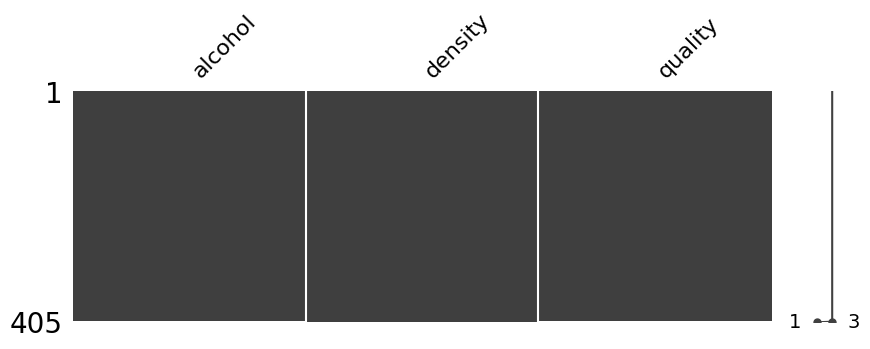

In [27]:
import missingno as msn

msn.matrix(df, figsize=(10,3))

In [28]:
pd.DataFrame({'missing values': [df[col].isna().sum() for col in df.columns]}, index=df.columns.values)

,missing values
alcohol,1
density,0
quality,1


Two variables (alcohol, quality) contain 1 data point or 0.2% missing value.

Handling missing value:

In [29]:
df.dropna(inplace=True)

`Rare Labels`

Rare value detection and quantification:

In [30]:
pd.DataFrame(df['quality'].value_counts(normalize=True) * 100).round(2)

,proportion
quality,
6.0,45.05
5.0,31.44
7.0,15.10
4.0,4.21
8.0,3.22
3.0,0.99


More than 50% is dominated by wines with a quality of more than 6.

Handling rare value:

In [31]:
import numpy as np

df['quality'] = df['quality'].apply(lambda x: np.where(x > 6, 1, 0))

`Outliers`

Outlier detection and quantification.

/tmp/ipython-input-2420736601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alcohol', data=df, width=.2, palette="vlag", ax=ax[0])
/tmp/ipython-input-2420736601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='density', data=df, width=.2, palette="vlag", ax=ax[1])


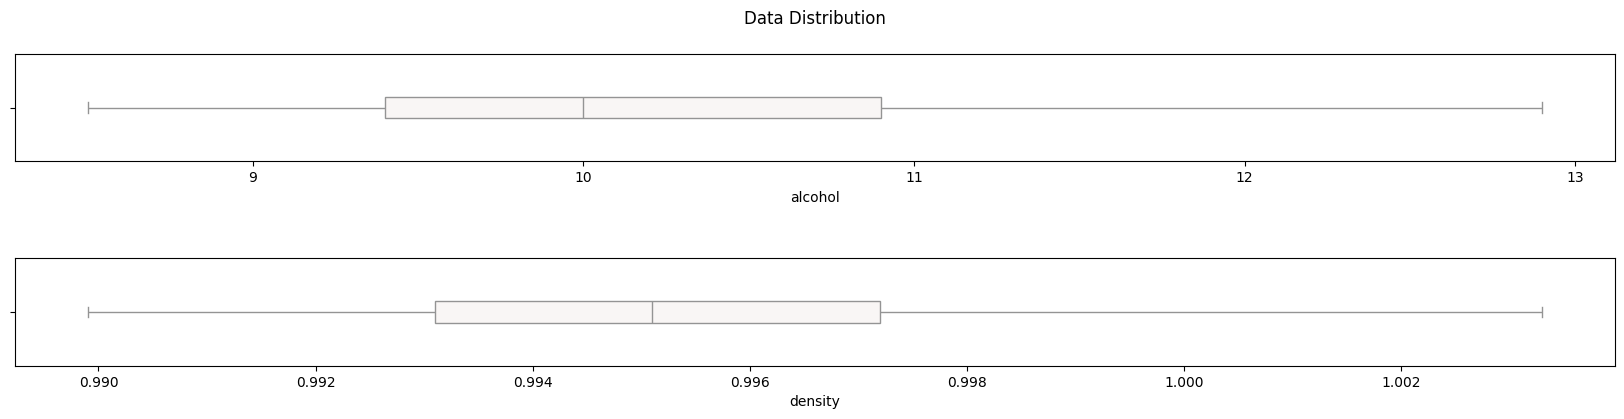

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 4))

sns.boxplot(x='alcohol', data=df, width=.2, palette="vlag", ax=ax[0])
sns.boxplot(x='density', data=df, width=.2, palette="vlag", ax=ax[1])

ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


In [33]:
# Perform IQR calculation for outlier detection

Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

n_outlier = df['density'] >= (Q3 + 1.5*IQR)
df[n_outlier].shape

(0, 3)

There are no outliers in the density variable.

`Imbalance Data`

Detection and quantification of target label proportion.

In [34]:
df['quality'].value_counts(normalize=True) * 100

,proportion
quality,
0,81.683168
1,18.316832


The percentage of label 0 (81.6%) is more than label 1 (18.2%). This case is considered as imbalanced data.

`Check Multicollinearity`

Detecting multicollinearity between features with VIF.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns='quality')
y = df['quality']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] =  X.columns

vif.round(2)

,VIF Factor,Feature
0,88.56,alcohol
1,88.56,density


There is multicollinearity between the alcohol and density features. When using a linear model, multicollinearity should be avoided. However, for this case study, we will maintain this features.

**Feature Engineering**

Split the dataset into train and test sets.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=0, stratify=y
)

X_train.shape, X_test.shape

((282, 2), (122, 2))

### `Model Experiment`

Setting basic parameters to initialize the experiment and create a transformation pipeline.

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


**Benchmark Model**

`Without Scaling`

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Define the models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)

In [39]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Models
models = [logreg, knn, dtree]
# Create list to store score
accuracy_mean = []
accuracy_std = []
all_accuracy = []
model_name = []

# Find the best algorithm
for model in models:
    # Pipeline
    model_pipeline = Pipeline([
        ('scaling', scaler),
        ('modeling', model)
    ])
    # Cross validation
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(
        model_pipeline,                 # the pipeline used (model and preprocessing)
        X_train,                        # feature
        y_train,                        # target
        cv=skfold,                      # number of cross validation
        scoring='accuracy'              # metric used
    )
    accuracy_mean.append(model_cv.mean())
    accuracy_std.append(model_cv.std())
    all_accuracy.append(model_cv.round(4))
    model_name.append(model.__class__.__name__)

In [40]:
pd.DataFrame({
    'model': model_name,
    'mean': accuracy_mean,
    'std': accuracy_std,
    'all score': all_accuracy
})

,model,mean,std,all score
0,LogisticRegression,0.946805,0.019567,"[0.9474, 0.9474, 0.9643, 0.9107, 0.9643]"
1,KNeighborsClassifier,0.960965,0.017550,"[0.9649, 0.9649, 0.9821, 0.9286, 0.9643]"
2,DecisionTreeClassifier,0.925439,0.028748,"[0.9474, 0.9298, 0.8929, 0.8929, 0.9643]"


**Insight**

- We modeled using three different ML algorithms: Logistic Regression, KNN, and Decision Tree.
- We also performed 5-fold cross-validation.
- The metric we used was accuracy.
- We determined the best model based on:
- Highest mean accuracy (good model performance)
- Lowest standard accuracy (stable model performance)
- The benchmark for the best model was the KNeighborsClassifier.
- Therefore, we will use the KNeighborsClassifier to make predictions on the test set.

*Predict Benchmark Model to Test Set*

In [41]:
from sklearn.metrics import accuracy_score
# Define model
model_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', knn)
])
# Fitting
model_pipeline.fit(X_train, y_train)
# Predict to test set
y_pred_test = model_pipeline.predict(X_test)
# Evaluate
score = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on the test set: {score:.4f}')

Accuracy on the test set: 0.9672


The performance of the model is 96.72%.

**Hyperparameter Tuning**

In [42]:
# hyperparameter space

param_grid={
    'modeling__metric': ['minkowski', 'euclidean'],
    'modeling__weights': ['uniform', 'distance'],
    'modeling__n_neighbors': range(3,30,2)
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# model benchmark
knn = KNeighborsClassifier()

# model dalam pipeline
model_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', knn)
])

skfold = StratifiedKFold(n_splits=5)

# RandomizedSearch
tuned_model = RandomizedSearchCV(
    estimator = model_pipeline,
    param_distributions = param_grid,
    cv = skfold,
    scoring = 'accuracy',
    n_jobs=-1,
    n_iter=30,
    random_state = 0
)

# fitting tuned model
tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('scaling', RobustScaler()),
                                             ('modeling',
                                              KNeighborsClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'modeling__metric': ['minkowski',
                                                             'euclidean'],
                                        'modeling__n_neighbors': range(3, 30, 2),
                                        'modeling__weights': ['uniform',
                                                              'distance']},
                   random_state=0, scoring='accuracy')

In [44]:
print(f'Accuracy on train set: {tuned_model.best_score_:.3f}')
print(f'Best parameter on train set: {tuned_model.best_params_}')

Accuracy on train set: 0.964
Best parameter on train set: {'modeling__weights': 'uniform', 'modeling__n_neighbors': 3, 'modeling__metric': 'euclidean'}


**Predict the Tuned Model to Test Set**

In [45]:
# Define model
best_model = tuned_model.best_estimator_
# Fitting model
best_model.fit(X_train, y_train)
# Predict to test set
y_pred_best = best_model.predict(X_test)
# Evaluate
score = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on the test set : {score:.3f}')

Accuracy on the test set : 0.984


| Accuracy Score | Train Set | Test Set |
| --- | --- | --- |
| Before Tuning | 0.961 | 0.967 |
| After Tuning | 0.964 | 0.984 |

**Insight**

- The model selected for modeling this dataset is **K-Nearest Neighbors (KNN)**.
- Hyperparameter tuning **successfully improved** the KNN model's performance based on accuracy.
- The best hyperparameters based on RandomizedSearch are **{'modeling__weights': 'uniform', 'modeling__n_neighbors': 3, 'modeling__metric': 'euclidean'}**
- If we still want to try to improve this KNN model, we can try:
  - Reset the values ​​entered in the hyperparameters.
  - Change the ML algorithm.
  - Feature Engineering.
  - Experiment with hyperparameters.